# Jupyterhub Demo
***

## Analyst-Hero
### POCs: Max Buenger, Data Scientist III
### Date: 05-04-2023
***

<br/> 
<br/>

# Heading 1
## Heading 1.1

# Heading 

## Heading 

* Bullet point
  * bullet point
  * bullet point

**BOLD**

*Italic*

## Inline Link

This is [Google](www.google.com). 

## Blockquotes

> This is the first level of quoting.
> > This is nested blockquote

## Inline Images

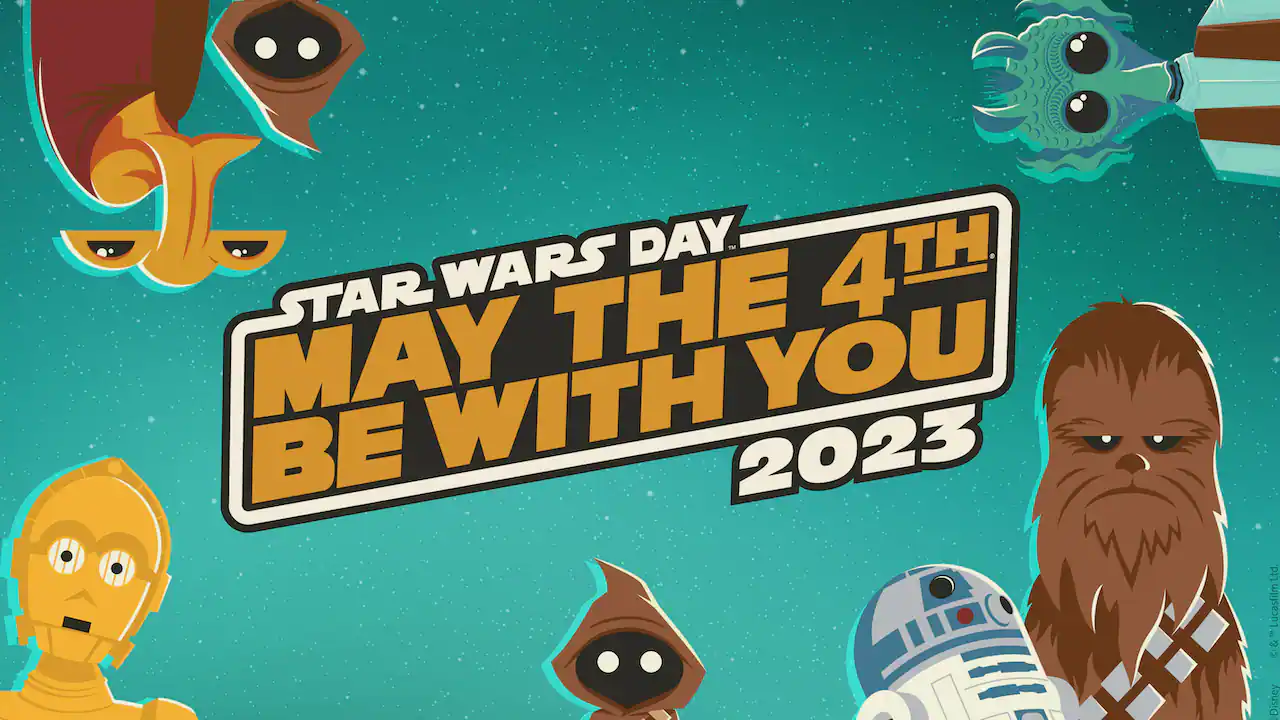


$\left(\int_{a}^{b} f(x) \; dx\right)$

## Inline Code

This is a `code`

## To do list

- [x] Done
- [ ] To do

## Table 
Google transfer Excel table to jupyter notebook table

|Left |Center|Right|
|:-----|:----:|----:|
|1 |A |C |
|2 |B |D |

# Short-cuts

* Esc + a/b -- insert cell above/down
* Esc + d,d -- delete cell
* Esc + c/v/x -- copy/paste/cut cell
* Esc + m -- markdown
* Esc + y -- code
* Esc + m -- merge cells
* Esc + - -- split cell

# Import Packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import math
import pyspark.sql.functions as F
from pyspark.sql.types import StringType,BooleanType,DateType
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import time

from pyspark.sql import SparkSession
spark = (
    SparkSession.builder.enableHiveSupport().appName("PAX_Economics")
        .config("spark.sql.shuffle.partitions", "100")
        .config("spark.driver.maxResultSize","15g")
        .config("spark.sql.execution.arrow.enabled", "true")
        .config("spark.sql.repl.eagerEval.enabled", "true")
        .config("spark.executor.instances", "50")
        .config("spark.executor.cores", "8")
        .config("spark.executor.memory", "30g")
        .config("spark.driver.memory", "60g")
        .getOrCreate()
)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.seterr(divide='ignore', invalid='ignore')
pd.set_option('mode.chained_assignment', 'warn')

# EDA--Exploratory Data Analysis

## Import Data

In [ ]:
df = pd.read_csv('name.csv')
df = pd.to_csv('name.csv')

In [ ]:
df = (spark.table("schema.table").filter(
    (F.col("col1") == 1 &
    (F.col("col2").isin('filter1','filter2'))).select("*"))
%time df = df.toPandas()

## Join Dataframes 

In [ ]:
df2 = pd.merge(df, df1, on = 'var1', how = 'inner/outer/left/right')
df2 = pd.merge(df, df1, left_on = 'var1', right_on = 'var2', how = 'inner/outer/left/right')

# EDA

In [ ]:
df.describe() ## return count, mean, min, max, median, etc...of each var
df.hist() ## return histogram plot of each numeric variable
df['var1'].value_counts() ## value counts of categorical variable

## Filtering/Group By/Generate New Variables

In [ ]:
df = df[df['var'].isin([1,2,3])]
df = df[~df['var'].isin([1,2,3])]
df = df[df['var'].isin([1,2,3]) & (df['var'].str.contains())]

## Generate aggregated variable: count can be replaced by mean, min, max
df['count'] = df.groupby(['var1','var2'])['value'].transform('count') 
## Pivot table
df_count = df.groupby(['var1','var2'])['value'].count()

df['dummy'] = np.where(df['var']>0, 1, 0)

## Missing Data Imputation

* Replace with mean/median
* KNN

In [1]:
print(df.isnull().sum()) ##show how many missing values each var has

df['var'] = df['var'].fillna(0)
df['var'] = df['var'].fillna(df['var'].mean())
df['var'] = df['var'].fillna('ffill')
df['var'] = df['var'].fillna('bfill')

NameError: name 'df' is not defined

## Outliers

* Isolation Forest
* DBScan clustering
* Boxplots
* Robust Random Cut Forest

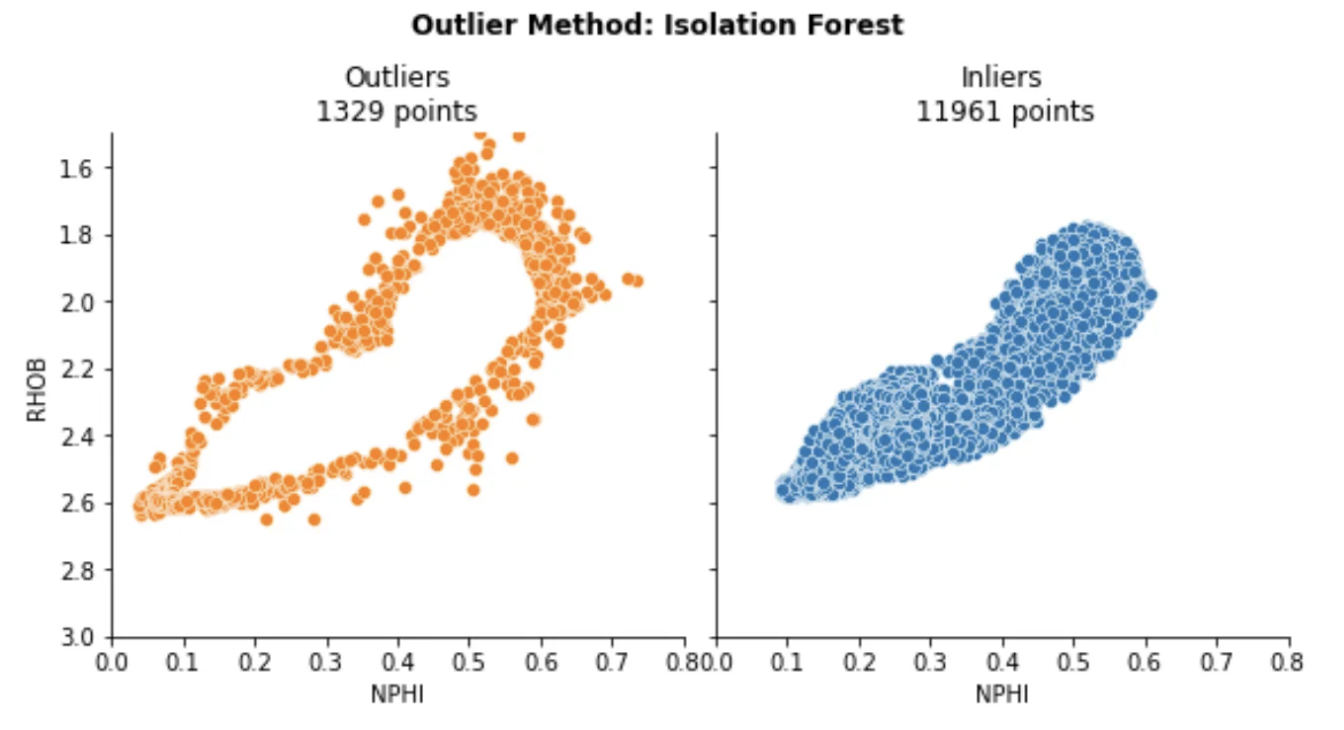

## Text Data

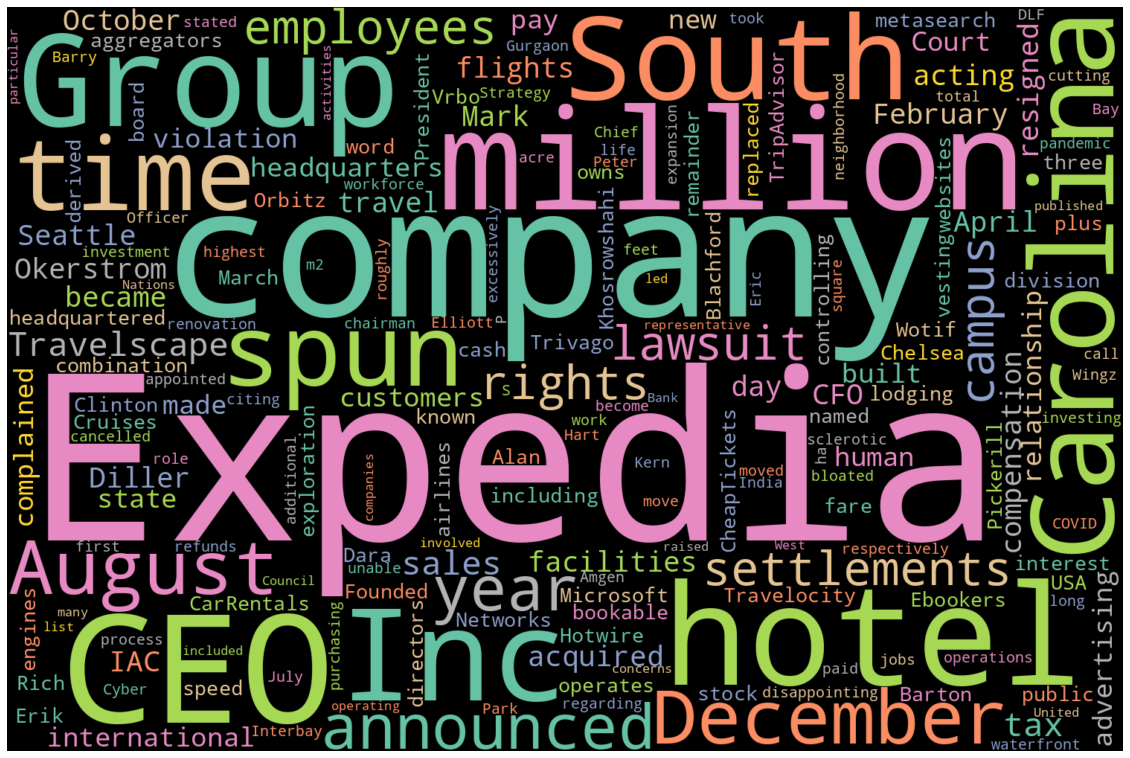

In [7]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image, ImageDraw, ImageFont
import wikipedia
import PIL
import re
import matplotlib.pyplot as plt

wiki = wikipedia.page('Expedia Group')
text = wiki.content

def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', x)
    return x
text = clean_text(text)

def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off")

# Generate wordcloud
wordcloud = WordCloud(
    width = 1500, 
    height = 1000, 
    random_state = 1, 
    background_color='black', 
    colormap = 'Set2', 
    collocations=False, 
    #max_words = 20,
    stopwords = set(STOPWORDS)
).generate(text)

plot_cloud(wordcloud)

# Feature Engineering

## One-hot-encoding

In [ ]:
train = pd.get_dummies(train, columns=['var1','var2','var3'])

## Train/Test Split

In [ ]:
feature_list = ['var1','var2','var3',...]
X = df[feature_list]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Correlation Check

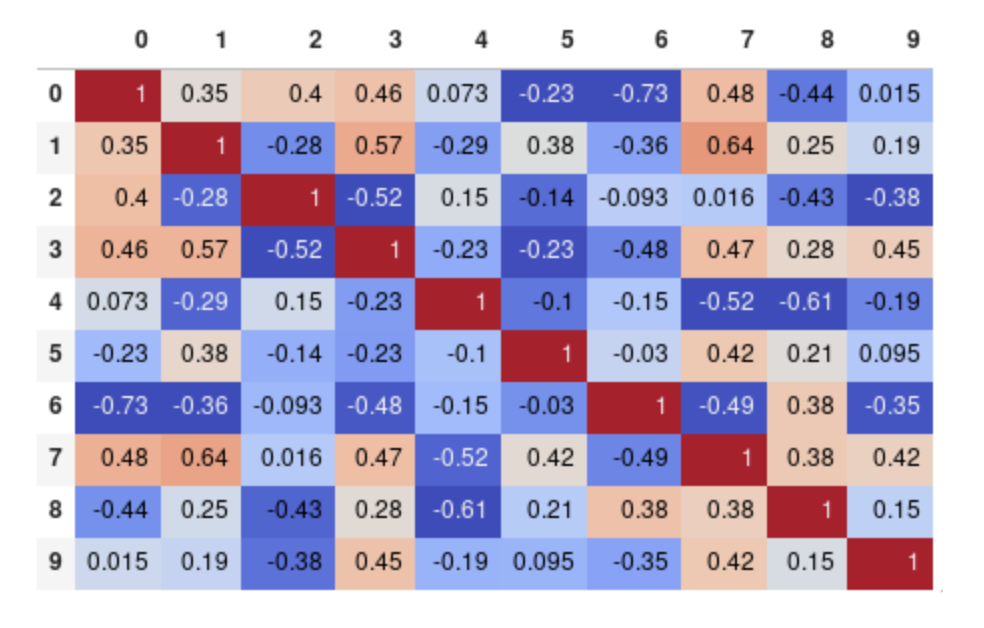

# Modeling

## Predictive Modeling

* Classicification Model
  * Logistic Model
  * SVM
  * Catboost
  * XGBoost
  * Random Forest
  * Deep Learning-RNN,CNN
  * NLP-NLTK, deep learning
  
* Regression Model
  * Linear Model
  * SVM
  * Catboost
  * XGBoost
  * Random Forest
  * Deep Learning-RNN,CNN

## Forecasting-Time Series

* ARIMA
* SARIMAX
* PROPHET
* Deep Learning

## Causal Inference

* Traditional: 
  * Difference-in-Difference (DID)
  * Regression Discontinuity Design (RDD)
  * Prospensity Score Matching (PSM)
  * Synthetic Control Model (SCM)


* Causal Machine Learning
  * Causal Forest 
  * S/T/X/R Learner (CausalML)

## Interpretation and Prediction Trade off

* Statistics Models
  * Easy to interpret with coefficients
  * Underfitting issue
  * less computation time
  * can try boostrap for model performance
  
* Machine learning Models
  * Cannot provide coeffcients (only feature importance)
  * May encounter overfitting issue
  * It can run forever
  * More flexible and better dealing with big data set

## Model Evaluation

* Classification: Precision, accuracy, sensitivity, recall, F1 score, confusion matrix
* Regression: MSE, MAE, log-likelihood loss, cross-entrophy

# Tips of Jupyterhub

* Interact with Github
* Outlines
* Collabrate with other scientists